In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Semana 10. Clase 14: Transformadas de Fourier, señales periódicas, exponencial compleja en tiempo discreto</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Comprender las transformadas y el proceso de ventanas 

> + Aprendar sobre los dominios del tiempo y la frecuencia, las transformadas rápidas de Fourier (FFT) y
ventanas y cómo usarlas para mejorar nuestra comprensión de una señal.

> + Básicamente, la transformada de Fourier toma una señal y la descompone en ondas seno y conseno de diferentes amplitudes y frecuencias.


### Señales continuas coseno: $\cos()$ y seno: $\sin()$

>> + Son una clase de señales periódicas básicas y muy importantes.
>> + En los siguientes gráficos podemos ver que estas señales son **periódicas**.
>> + Cada repetición completa se denomina **ciclo**.
>> + La duración de cada ciclo se llama **período**. 
>> + La **frecuencia** de una señal es el número de ciclos por segundo, lo cual es el inverso del período. 
>> + Las unidades de frecuencia son ciclos por segundo, o bien, simplemente Hertz, abreviado **Hz**.
>> + Las señales que son periódicas las podemos descomponer en términos de esta clase de señales: coseno y seno, con diferentes amplitudes y componentes de frecuencias.

In [2]:
# importo módulos y librerías
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [54]:
# mi creo mis propias funciones
def create_figure_stem(x,y):
    fig = plt.figure(figsize=(18, 3))
    ax  = plt.gca()
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
    ax.stem(x,y,'b')
    return

def create_figure_plot(x1,y1,x2,y2):
    fig = plt.figure(figsize=(18, 3))
    ax  = plt.gca()
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    ax.plot(x1, y1, 'b'                   , linewidth=4)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4)
    
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.legend(['sin(x)', 'cos(x)'])
    
    return

def create_figure_plot_1Hz(x1,y1,x2,y2):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x1, y1, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (1 Hz)', 'cos (1 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_plot_10Hz(x1,y1,x2,y2):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x1, y1, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (10 Hz)', 'cos (10 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_expcomplex_2Hz(x1,y1,x2,y2):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x1, y1, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (10 Hz)', 'cos (10 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_exp_real(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x, y, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Parte real de exponencial compleja TC',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['$Re\{e^{j2\pi F t}\}$'], prop={'size': 18}, loc='lower left')
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_exp_imag(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x, y, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Parte imaginaria de exponencial compleja TC',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['$Im\{e^{j2\pi F t}\}$'], prop={'size': 18}, loc='lower left')
    plt.setp(ax.spines.values(), linewidth=3)
    return
    
    
def create_figure_expDT(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    ax.stem(x, y)
    ax.set_yticks(np.linspace(-1,1,5,endpoint=True))
    ax.grid(True, which='both')
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
    plt.title('Parte real de exponencial compleja TD',fontsize=20)
    plt.xlabel('índice de muestra $n$ ', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['$e^{j2\pi f n}$'], prop={'size': 18}, loc='lower left')
    
def create_figure_expDT_2(x,y,z,t):
    fig, ax = plt.subplots(figsize=(18,3))
    ax.stem(x, y)
    ax.plot(t, z, color=[1.0, 0.5, 0.05], linewidth=0.5, linestyle="-")
    ax.set_yticks(np.linspace(-1,1,5,endpoint=True))
    ax.grid(True, which='both')
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
    plt.title('Parte real de exponencial compleja TD',fontsize=20)
    plt.xlabel('índice de muestra $n$ ', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['$e^{j2\pi F t}$', '$e^{j2\pi f n}$'], prop={'size': 18}, loc='lower left')    
    
def create_figure_plot_x1Hz(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x, y, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    #ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    #ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (10 Hz)', 'cos (10 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_unafigure_plot_1Hz(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x, y, color="blue", linewidth=4.0, linestyle="-")
    
    # defino limites para x
    #ax.set_xlim(0.0,1.0)
    # defino ticks para x
    #ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['cos (1 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_unafigure_plot_5Hz(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x, y, color="blue", linewidth=4.0, linestyle="-")
    
    # defino limites para x
    #ax.set_xlim(0.0,1.0)
    # defino ticks para x
    #ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['cos (5 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_unafigure_plot_25Hz(x,y):
    fig, ax = plt.subplots(figsize=(18,3))
    ax.plot(x, y, color="blue", linewidth=4.0, linestyle="-")
    ax.set_ylim(-1.2,1.2)
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['cos (25 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_sum(t,x1,x2,x3):
    fig, ax = plt.subplots(figsize=(18,3))
    ax.plot(t, x1+x2+x3, color="blue", linewidth=4.0, linestyle="-")
    ax.set_ylim(-5.2,5.2)
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['cos (25 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)

### Amplitud 1.0 y frecuencia 1 Hz

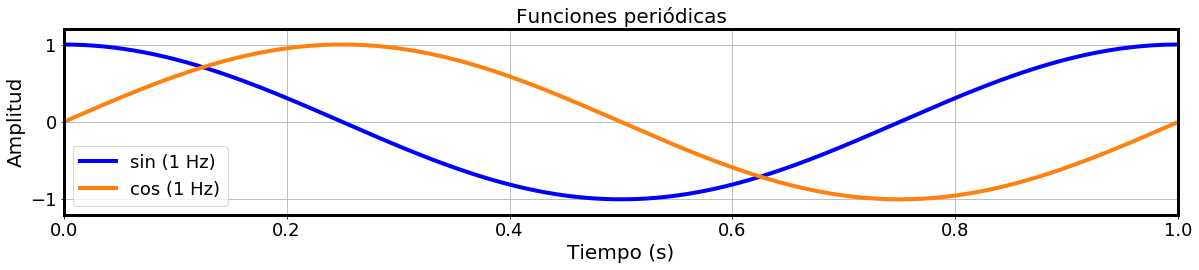

In [12]:
# defino los argumentos:
T   = 1           # duración en (segundos)
f   = 1000        # muestras
Num   = T * f     # duración total en (muestras)

#print(N)

# defino una variable temporal:
t   = np.linspace(0, T, Num)

# defino parámetros de una señal
f   = 1 # frecuencia
A   = 1 # amplitud 

# defino cada función periódica:
x1  = A * np.cos(2*np.pi*f*t)
x2  = A * np.sin(2*np.pi*f*t)

create_figure_plot_1Hz(t,x1,t,x2)

### Amplitud 0.5 y frecuencia 10 Hz 

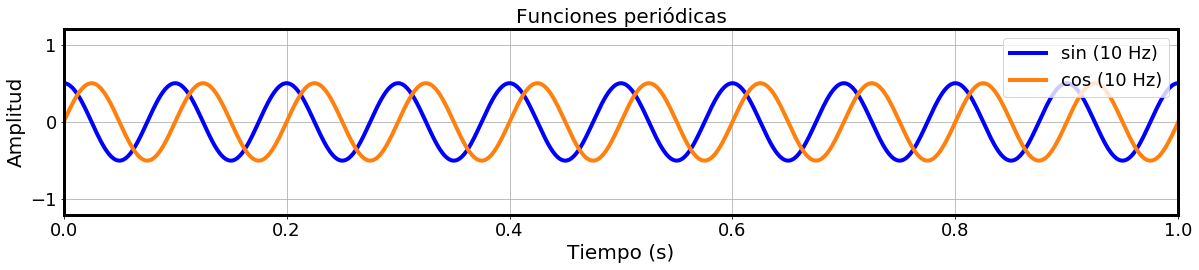

In [13]:
# defino los argumentos:
T   = 1         # duración en (segundos)
f   = 1000      # muestras
Num   = T * f   # duración total en (muestras)

#print(N)

# defino una variable temporal:
t   = np.linspace(0, T, Num)

# defino parámetros de una señal
f1  = 10 # frecuencia
A   = 0.5 # amplitud 

# defino cada función periódica:
x3  = A * np.cos(2*np.pi*f1*t)
x4  = A * np.sin(2*np.pi*f1*t)

create_figure_plot_10Hz(t,x3,t,x4)

### Señales exponenciales complejas
+ Notaciones y abreviaciones: 

> + Exponenciales complejas: $e^{j2\pi F t}$, $e^{j2\pi f n}$
> + Frecuencia en tiempo continuo: $F$
> + Frecuencia en tiempo discreto: $f$
> + Tiempo continuo: $t\in\mathbb{R}$
> + Tiempo discreto: $n\in\mathbb{Z}$
> + Conjunto de números reales: $\mathbb{R}$
> + Conjunto de números enteros: $\mathbb{Z}$
> + Conjunto de números racionales: $\mathbb{Q}$
> + Conjunto de números complejos: $\mathbb{C}$
> + TC: tiempo continuo
> + TD: tiempo discreto
> + Fórmula de Euler: 
$$
\begin{align*}
{\text{e}}^{\,j\, 2\pi \,{\color{blue}{\bf{f}}} \,t} & = \underbrace{{\text{cos}}\,(2\pi\, \color{blue}{\bf{f}}\, t)}_{\text{parte real}}+j\,\underbrace{{\text{sin}}\,(2\pi\, \color{blue}{\bf{f}}\, t)}_{\text{parte imaginaria}}
\end{align*}
$$

### Señales exponenciales complejas en tiempo continuo y tiempo discreto

<p style="text-align:center">
<a title="Relación Momentum"><img src="expcom.png" width="450" height="450" alt="Tiny"></a>
<strong></strong> 
    
+ Unidades: 
$$
\begin{align*}
F &= {\bigg[}\,Hz = \frac{ciclos}{s}\,{\bigg]}\\
f & = F\,{\bigg[}\,Hz = \frac{ciclos}{s}\,{\bigg]}\cdot T {\bigg[}\,\frac{s}{muestras}\,{\bigg]} =  {\bigg[}\,\frac{ciclos}{muestras}\,{\bigg]}                      
\end{align*}
$$
    
+ Unidades de frecuencia angular: 
$$
\begin{align*}
\Omega\,{\bigg[}\,\frac{radianes}{s}\,{\bigg]} &= 2\pi {\bigg[}\,\frac{radianes}{ciclos}\,{\bigg]}\,\cdot F\,{\bigg[}\,\frac{ciclos}{s}\,{\bigg]}\\
\omega\,{\bigg[}\,\frac{radianes}{muestras}\,{\bigg]} &= 2\pi {\bigg[}\,\frac{radianes}{ciclos}\,{\bigg]}\,\cdot f\,{\bigg[}\,\frac{ciclos}{muestras}\,{\bigg]}
\end{align*}
$$

### Exponencial compleja en tiempo continuo
> + $e^{j2\pi F t}$, $-\infty < t < \infty$

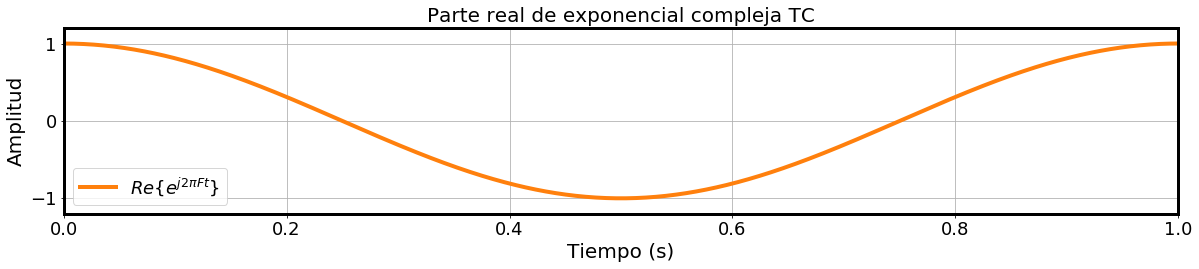

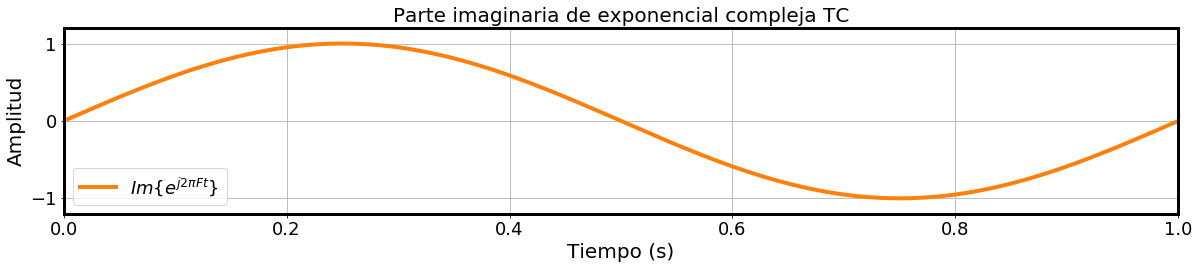

In [22]:
# defino los argumentos:
T   = 1         # duración en (segundos)
f   = 1000      # muestras 
Num   = T * f   # duración total en (muestras)

#print(N)

# defino una variable temporal:
t   = np.linspace(0, T, Num)

# defino parámetros de una señal
F  = 1 # frecuencia
A   = 1.0 # amplitud 

# defino función exponencial compleja:
xexp  = A * np.exp(1j*2*np.pi*F*t)
xexp2  = A * np.exp(1j*2*np.pi*F*t)
create_figure_exp_real(t,xexp.real)
create_figure_exp_imag(t,xexp2.imag)

### Exponencial compleja en tiempo discreto
+ La versión discreta de la exponencial compleja en TC, se obtiene tomando muestras de 0 a 1 s.
+ Vamos a suponer que el período de muestreo es $T = 0.1$ (s/muestras) y que cuando muestreamos tomamos 10 muestras en este segundo.
+ $e^{j2\pi f n}$

<ipython-input-54-6b9d014527b3>:173: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(x, y)
/home/kasparov/miniconda3/envs/acus340/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


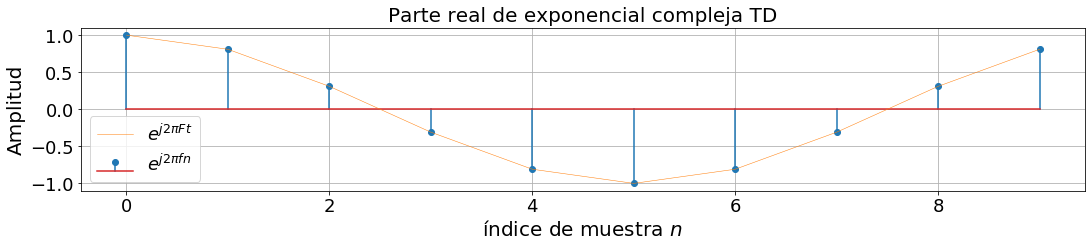

In [55]:
T      = 0.1  # período de muestreo 0.1 [s/muestras]. Muestreamos 10 veces en este segundo
Num    = 10   # período en muestras
n      = np.arange(Num)
F      = 1
A      = 1

t2     = np.arange(1/T) # the points on the x axis for plotting
xexp2  = A * np.exp(1j*2*np.pi*F2*(t2*T))

xexpDT = np.exp(1j*2*np.pi* F*T * n)
create_figure_expDT_2(n,xexpDT,xexp2,t2)
#print(len(n))

### Período de la señal exponencial compleja
+ El período para la señal en TC es el inverso de la frecuencia:
$$
\begin{align*}
T &= 1 s\\
F &= \frac{1}{T}= 1 Hz
\end{align*}
$$
es decir, la señal completa un ciclo en 1 s.
+ El período para la señal en TD, se obtiene viendo cuán lejos tenemos que movernos en tiempo para que la señal se repita. La respuesta es 10. Porque vamos desde el índice 0 hasta el índice 9 y ese es un período. El segundo período comienza en el índice 10. Por lo tanto, el período en TD es $N = 10$ muestras.

### Señales periódicas:
+ En TC:
$$
\begin{align*}
x(t+kT) = x(t), \forall t \in \mathbb{R}\,\, {\text{y}}\,\, k \in\mathbb{Z}
\end{align*}
$$
Periódica con período $T\in\mathbb{R}$ (s).

+ En TD:
$$
\begin{align*}
x[n+kN] = x[t], \forall n \in \mathbb{Z}\,\, {\text{y}}\,\, k \in\mathbb{Z}
\end{align*}
$$
Periódica con período $N\in\mathbb{Z}$ (muestras).

+ El período es siempre el número más pequeño $T$ o bien, $N$, que satisfacen estas definiciones.

### Señal exponencial compleja en TC:
$$
\begin{align*}
x(t) &= e^{j\,2\pi F\,t}
\end{align*}
$$

$$
\begin{align*}
x(t+T) &= x(t),\,\, \forall t \in \mathbb{R}\\
e^{j\,2\pi F\,t}\,\,\underbrace{e^{j\,2\pi F\,T}}_{=1}&= e^{j\,2\pi F\,t}\\
FT & = m \in \mathbb{Z}\\
F &=\frac{m}{T}\\
F &=\frac{1}{T}\quad {\text{(se escoge el más pequeño,}}\,\, m=1)
\end{align*}
$$
+ $e^{j\,2\pi F\,t}$ es periódica para todas las frecuencias.
+ El período es $T=1/F.$

### Señal exponencial compleja en TD:
$$
\begin{align*}
x[n] &= e^{j\,2\pi f\,n}
\end{align*}
$$

$$
\begin{align*}
x[n+N] &= x[n],\,\, \forall n \in \mathbb{Z}\\
e^{j\,2\pi f\,n}\,\,\underbrace{e^{j\,2\pi f\,N}}_{=1}&= e^{j\,2\pi f\,n}\\
fN & = m \in \mathbb{Z}\\
f &=\frac{m}{N}\\
f &=\frac{p}{Q}\quad {\text{(se se reduce a fracción)}}
\end{align*}
$$
+ $e^{j\,2\pi f\,n}$ es periódica **si y sólo si** para frecuencias racionales.
+ El período es el denominador $Q$ y debe ser un entero, no como en el caso de TC en que $T$ puede ser cualquier número real.

### Un caso periódico: 
+ aquí la frecuencia es $f= 1/10$ eso significa que el período es el denominador y se ve en la gráfica:
<p style="text-align:center">
<a title="Relación Momentum"><img src="Nperiodo.png" width="450" height="450" alt="Tiny"></a>
<strong></strong> 


/home/kasparov/miniconda3/envs/acus340/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-3-80eb78cea475>:139: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(x, y)


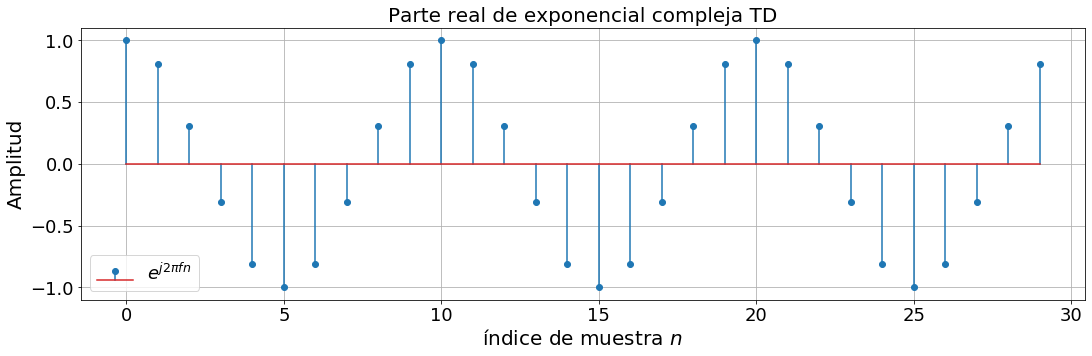

In [8]:
Num    = 30   # período en muestras
n      = np.arange(Num)
f      = 1/10
A      = 1

xexpDT = A*np.exp(1j*2*np.pi* f * n)
create_figure_expDT(n,xexpDT)

### Un caso no periódico:

+ aquí la frecuencia es $f= \sqrt{2}-1$ eso significa que la frecuencia es irracional y se ve en la gráfica:
<p style="text-align:center">
<a title="Relación Momentum"><img src="firra.png" width="450" height="450" alt="Tiny"></a>
<strong></strong> 
+ Esta señal por lo tanto, nunca se va a repetir.    

/home/kasparov/miniconda3/envs/acus340/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-3-80eb78cea475>:139: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(x, y)


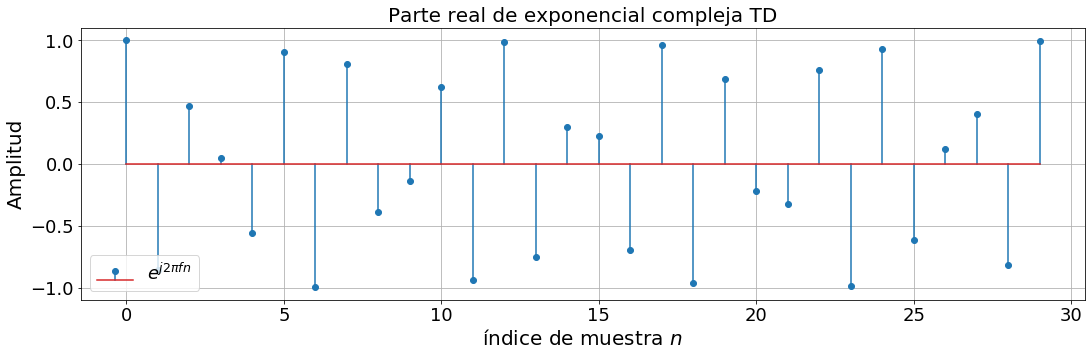

In [9]:
Num    = 30   # período en muestras
n      = np.arange(Num)
f      = np.sqrt(2)-1
A      = 1

xexpDT = A*np.exp(1j*2*np.pi* f * n)
create_figure_expDT(n,xexpDT)

### Dos exponenciales complejas en TC:
+ Supongamos que se cumpla la siguiente condición:
$$
\begin{align*}
e^{j2\pi F_{1}\large t}&=e^{j2\pi F_{2}\large t},\quad \forall t\\
e^{j2\pi (F_{1}-F_{2})\,\large t} & = 1,\quad \forall t\\
(F_{1}-F_{2})\,{\large t} \in \mathbb{Z},\quad \forall t\\
F_{1}-F_{2} &=0\\
F_{1}&=F_{2}
\end{align*}
$$
+ Esto significa que misma señal implica misma frecuencia.
+ Frecuencias distintas implica señales distintas.

### Dos exponenciales complejas en TD:
+ Supongamos que se cumpla la siguiente condición:
$$
\begin{align*}
e^{j2\pi f_{1}\large n}&=e^{j2\pi f_{2}\large n},\quad \forall n\\
e^{j2\pi (f_{1}-f_{2})\,\large n} & = 1,\quad \forall n\\
(f_{1}-f_{2})\,n \in \mathbb{Z},\quad \forall n\\
(f_{1}-f_{2}) \in \mathbb{Z}\\
f_{1} &= f_{2} + k, \quad k\in \mathbb{Z}
\end{align*}
$$
+ Esto significa que misma señal implica frecuencias separadas por un entero.
+ Frecuencias separadas por no-entero, implica señales distintas.
+ Las exponenciales complejas en TD, **NO son únicas**.
+ Qué nos dice esto: que podemos tener dos exponenciales complejas con diferentes frecuencias que me dan idénticas señales con tal que las frecuencias difieran por un entero. Esto es muy extraño! pero nos está diciendo que las exponenciales complejas en TD no son únicas.

### Aliasing:

/home/kasparov/miniconda3/envs/acus340/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-3-80eb78cea475>:139: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(x, y)
/home/kasparov/miniconda3/envs/acus340/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-3-80eb78cea475>:139: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a s

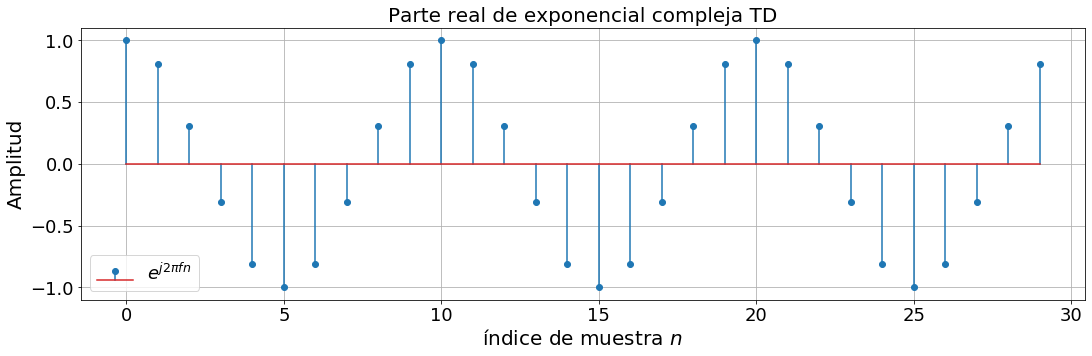

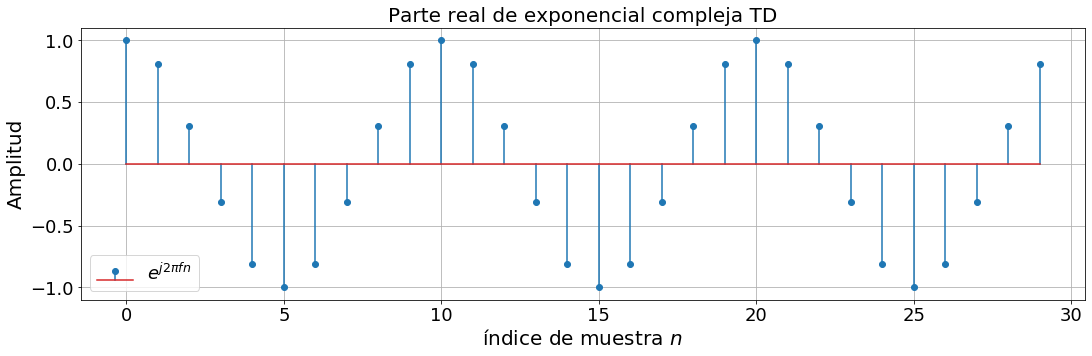

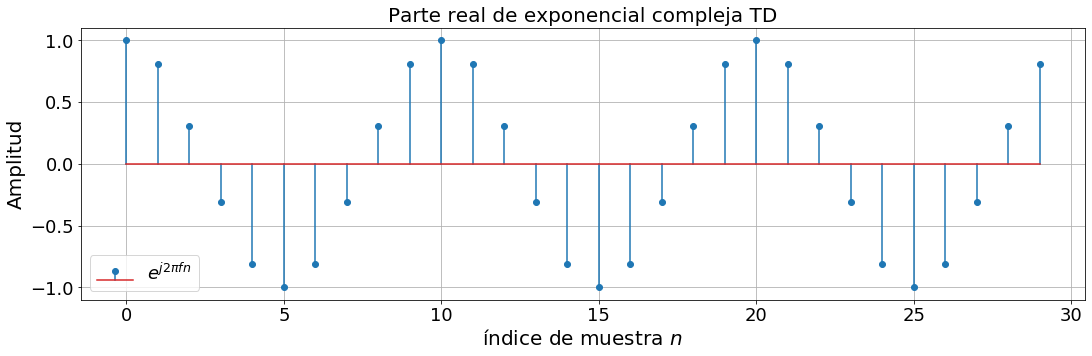

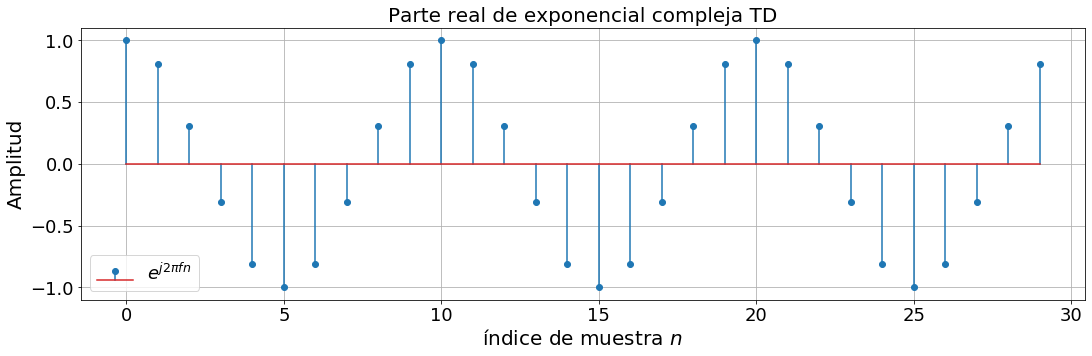

In [10]:
Num    = 30   # período en muestras
n      = np.arange(Num)
f0     = 1/10  # frecuencia más baja
A      = 1

xexpDT1 = A*np.exp(1j*2*np.pi* f0 * n)
create_figure_expDT(n,xexpDT1)

f02    = f0 + 1

xexpDT2 = A*np.exp(1j*2*np.pi* f02 * n)
create_figure_expDT(n,xexpDT2)

f03    = f0 + 2

xexpDT3 = A*np.exp(1j*2*np.pi* f03 * n)
create_figure_expDT(n,xexpDT3)

f04    = f0 - 2

xexpDT4 = A*np.exp(1j*2*np.pi* f04 * n)
create_figure_expDT(n,xexpDT4)

+ Vemos que:

$$
\begin{align*}
e^{j2\pi (f_{0}-2)n} & = e^{j2\pi f_{0}n} = e^{j2\pi (f_{0}+1)n} = e^{j2\pi (f_{0}+2)n},\quad \forall n
\end{align*}
$$

+ Esto quiere decir que sufren **aliasing** entre todas ellas. Ellas tienen diferentes frecuencias pero sus formas de onda son equivalentes.

+ Otra cosa interesante es que mientras más y más crezca ese múltiplo entero $k$ (frecuencias altas) éstas producen **alias** de la frecuencia más baja.

<p style="text-align:center">
<a title="Relación Momentum"><img src="alias1.png" width="450" height="450" alt="Tiny"></a>
<strong></strong> 

### Intervalo fundamental de unicidad de frecuencia en TD:

+ Debido al fenómeno anterior para TD, 
<p style="text-align:center">
<a title="Relación Momentum"><img src="alias2.png" width="450" height="450" alt="Tiny"></a>
<strong></strong>
    
+ El intervalo fundamental tiene ancho 1 [ciclo / muestra].
+ Este intervalo puede estar en dos casos como se ve en la figura.
+ Este intervalo contiene frecuencias únicas.
+ Las frecuencias fuera de este intervalo tienen alias en el intervalo fundamental.


### Otra manera de visualizar este intervalo fundamental de frecuencias únicas:
+ Una buena referencia: https://www.youtube.com/watch?v=ey6TyYN18mk

<p style="text-align:center">
<a title="Relación Momentum"><img src="otras.png" width="400" height="400" alt="Tiny"></a>
<strong></strong>
    
+ La línea azul más gruesa representa el círculo unitario en el plano complejo. 
+ La exponencial compleja es una señal que tiene una magnitud o módulo igual a 1.
+ Si medimos la exponencial compleja $e^{j2\pi f}$ vemos que yace en este círculo unitario, $f$ se ve en la figura que tiene asociada una dirección de referencia positiva y otra, negativa.
+ Si nos movemos desde $f=0$ hasta $f=\frac{1}{2}$, nos moveremos por la parte de arriba del círculo unitario hasta llegar al valor -1 en el eje real.
+ Lo mismo se mantiene si nos movemos si nos movemos por las frecuencias negativas, terminamos en el mismo lugar que lo hicimos moviéndonos por arriba.     
+ Por lo tanto, mientras más y más altas sean las frecuencias entre 0 y 1/2, y entre 0 y -1/2, vemos que las frecuencias se repiten nuevamente. 
+ Las bajas frecuencias tienden a agruparse en la zona de $f=0$, minetras que las altas frecuencias tienden a estar cerca de 1/2 ó -1/2.
+ Aquí se encuntran todas las frecuencias y que no sufren de aliasing.
    

### Aplicación:
+ $e^{j2\pi F t}$
+ La tasa de oscilación aumenta indefinidamente cuando $F$ tiende a infinito, en otras palabras, $T=1/F$ tiende a cero.

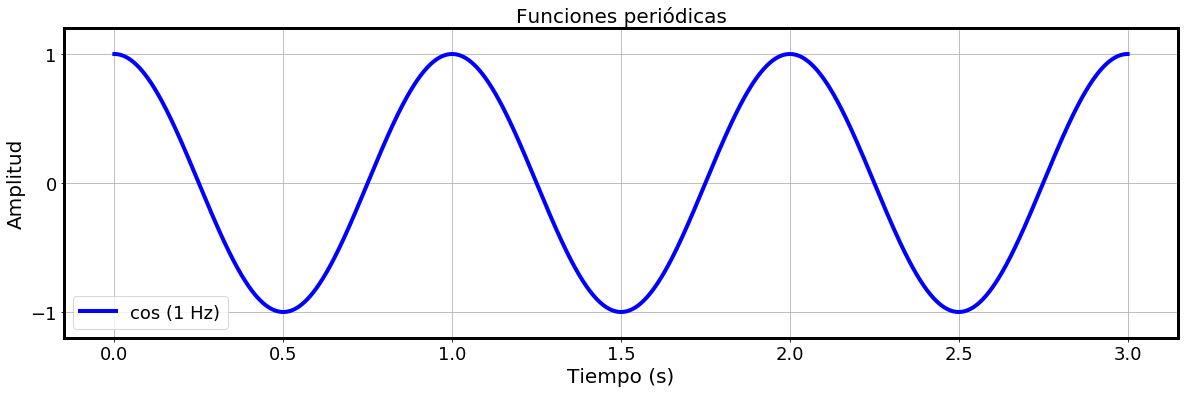

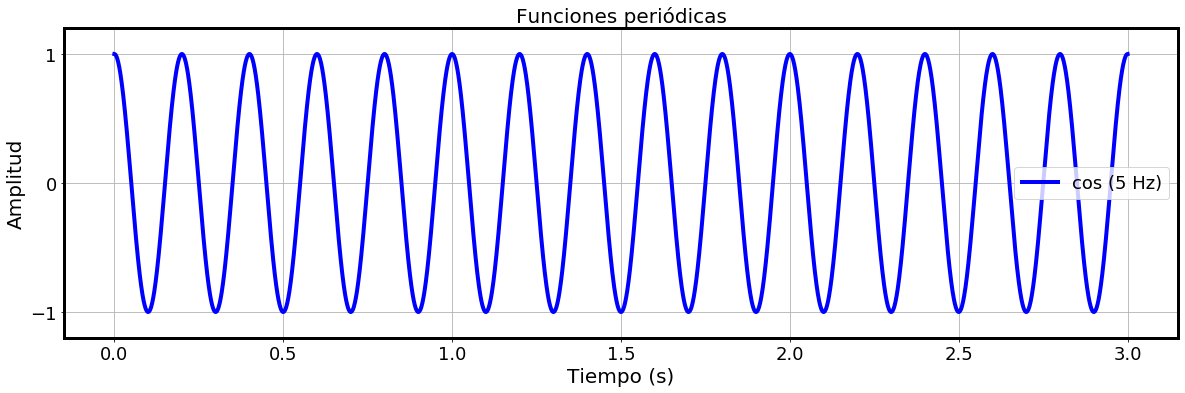

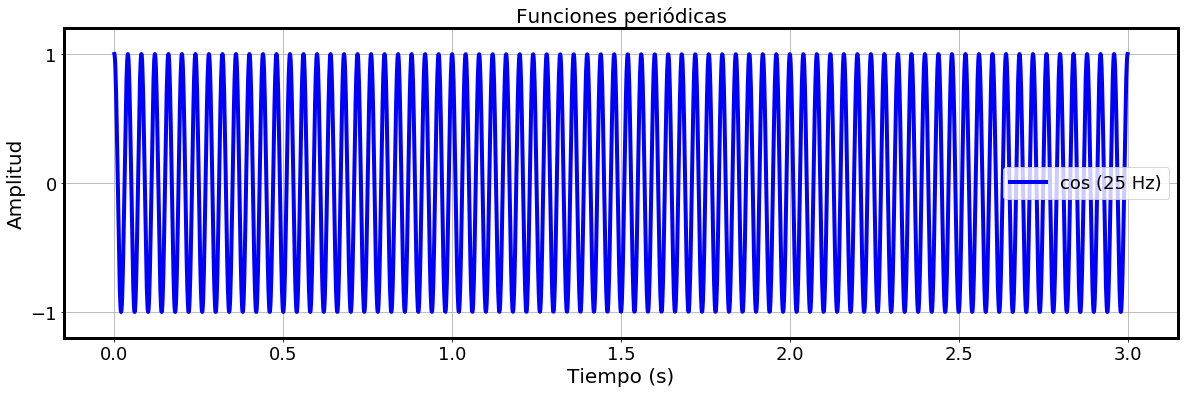

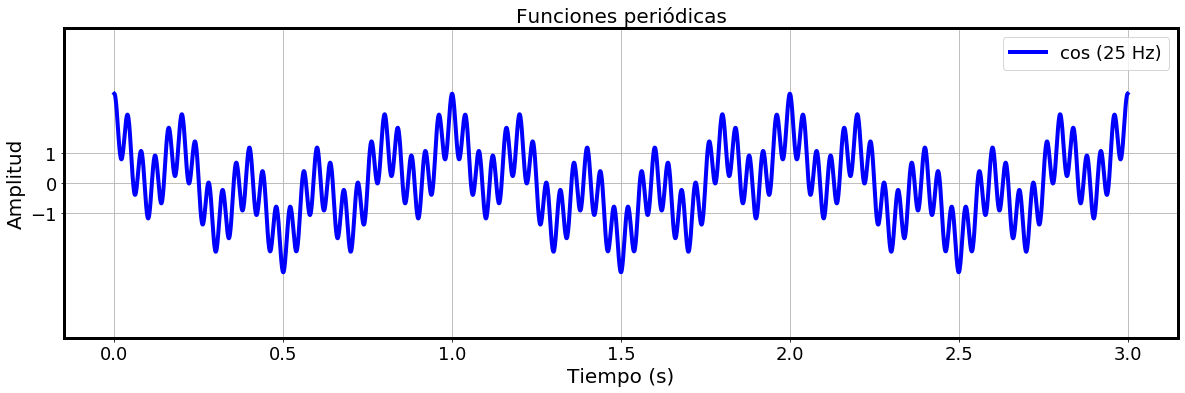

In [11]:
T   = 3         # períodos 
f   = 1000      # frecuencia (Hz)
Num   = T * f     # duración total en (muestras)

#print(N)

# defino una variable temporal:
t   = np.linspace(0, T, Num)

# defino parámetros de una señal
f1   = 1 # frecuencia
A   = 1 # amplitud 

# defino cada función periódica:
x1   = A * np.cos(2*np.pi*f1*t)

create_unafigure_plot_1Hz(t,x1)

f2   = 5 # frecuencia
x2   = A * np.cos(2*np.pi*f2*t)

create_unafigure_plot_5Hz(t,x2)

f3   = 25 # frecuencia
x3   = A * np.cos(2*np.pi*f3*t)

create_unafigure_plot_25Hz(t,x3)

create_figure_sum(t,x1,x2,x3)


### Transformada de Fourier
> + La transformada de Fourier de una señal $x(t)$ en tiempo continuo (señal análoga) está dada por:

$$
\begin{align*}
X(\Omega) & = \int_{-\infty}^{\infty} x(t)\,e^{-j\omega t} dt
\end{align*}
$$

> + Y la transformada de Fouerier inversa de $X(\Omega)$ viene dada por:

$$
\begin{align*}
x(t) & = \frac{1}{2\pi}\int_{-\infty}^{\infty} X(\Omega)\,e^{j\omega t} d\Omega
\end{align*}
$$


### Transformada de Fourier en tiempo discreto (DTFT)
> + Es la tarea de obtener la transformada de Fourier pero en tiempo discreto (DTFT) de una señal $x[n]$.

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="DTFT.png" width="380" height="380" alt="Tiny"></a>
    <strong>Figure 1. Muestreo de una señal $x(t)$ con frecuencia de muestreo $f_{s}$.</strong>

> + La DTFT o espectro de una señal $x[n]$ es:
$$
\begin{align*}
X(e^{j\omega})&=\sum_{n=-\infty}^{\infty} x[n]\,e^{-j\omega n}
\end{align*}
$$
    
> +  Y la transformada de Fouerier inversa de tiempo discreto (IDTFT) $X(e^{j\omega t})$ viene dada por: 

$$
\begin{align*}
x[n] &= \frac{1}{2\pi}\int_{-\pi}^{\pi} X(e^{j\omega})\,e^{j\omega n} d\omega
\end{align*}
$$
        
> + La señal $x[n]$ es generalmente de duración infinita.
> + El espectro $X(e^{j\omega})$ es una función continua de $\omega$.
> + Aunque la DTFT se puede calcular matemáticamente, ésta NO se puede calcular usando un computador.

### Truncar la señal $x[n]$ o dividirla en segmentos de corta duración (en unidades de muestras o a veces, unidades de tiempo)
 
> + Para dividir la señal $x[n]$ en segmentos de corta duración se considera multiplicar la señal por una ventana rectangular de amplitud unitaria.
    
<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="ventana.png" width="380" height="380" alt="Tiny"></a>
    <strong>Figure 1. Truncar una señal $x(t)$ usando una ventana rectangular.</strong>
    
> + La señal ventaneada es $x_{\text{w}}[n]=x[n]\cdot {\text{w}}_{r}[n]$.